In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
stores= pd.read_csv(r'D:\Data Science\Dataset\Retail Data Analysis\stores data-set.csv')
sales= pd.read_csv(r'D:\Data Science\Dataset\Retail Data Analysis\sales data-set.csv')
Features= pd.read_csv(r'D:\Data Science\Dataset\Retail Data Analysis\Features data set.csv')

In [80]:
Features["Date"].dtype

dtype('O')

In [81]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [82]:
sales.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True


In [83]:
Features['Date']=pd.to_datetime(Features['Date'])
sales['Date']=pd.to_datetime(sales['Date'])

In [84]:
Features.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [85]:
Features.shape, sales.shape,stores.shape

((8190, 12), (421570, 5), (45, 3))

In [86]:
print(sales['Date'][0], sales['Date'][-1:])
print(Features['Date'][0], Features['Date'][-1:])

2010-05-02 00:00:00 421569   2012-10-26
Name: Date, dtype: datetime64[ns]
2010-05-02 00:00:00 8189   2013-07-26
Name: Date, dtype: datetime64[ns]


In [87]:
df=pd.merge(sales,Features)

In [88]:
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [89]:
df.shape

(421570, 14)

In [90]:
df=pd.merge(sales,Features, on=['Store','Date', 'IsHoliday'], how='left')

In [91]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-12-02,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-05-03,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [92]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [93]:
df.drop_duplicates(inplace=True)

In [94]:
df.shape

(421570, 14)

In [95]:
for i in df.columns:
    percentage = (df[i].isnull().sum()/df.shape[0])*100
    if percentage>30:
        df.drop(i,axis=1,inplace=True)
        print(i,'is dropped')

MarkDown1 is dropped
MarkDown2 is dropped
MarkDown3 is dropped
MarkDown4 is dropped
MarkDown5 is dropped


In [96]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [97]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,42.31,2.572,211.096358,8.106
1,1,1,2010-12-02,46039.49,True,38.51,2.548,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106
4,1,1,2010-05-03,21827.90,False,46.50,2.625,211.350143,8.106


In [98]:
df.shape

(421570, 9)

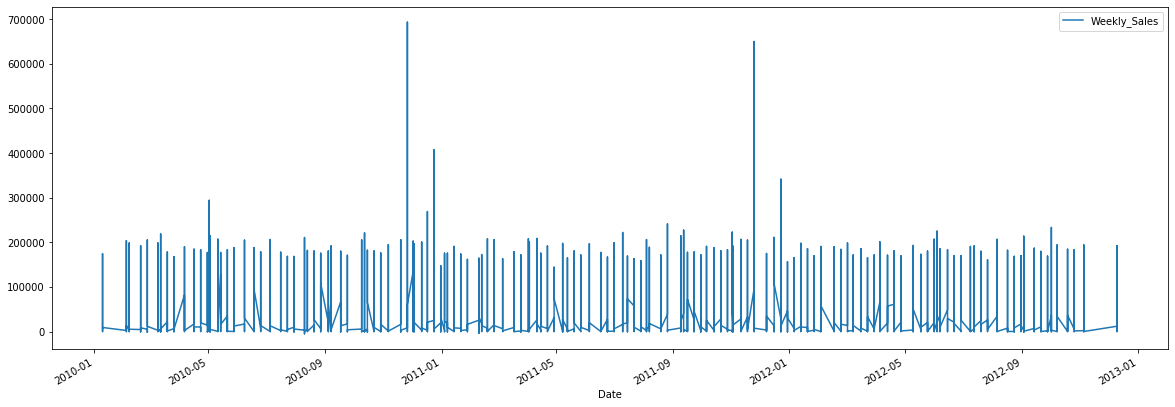

In [99]:
df[['Weekly_Sales','Date']].plot(x='Date',subplots=True,figsize=(20,7))
plt.show()

In [100]:
df.groupby(['Date'],as_index=False)['Weekly_Sales'].sum()

,Date,Weekly_Sales
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13
...,...,...
138,2012-10-08,47403451.04
139,2012-10-19,45122410.57
140,2012-10-26,45544116.29
141,2012-11-05,46925878.99


In [101]:
df_weekly_sales=df.groupby(['Date'],as_index=False)['Weekly_Sales'].sum()

In [102]:
df_sales=df_weekly_sales.sort_values('Weekly_Sales',ascending=False)

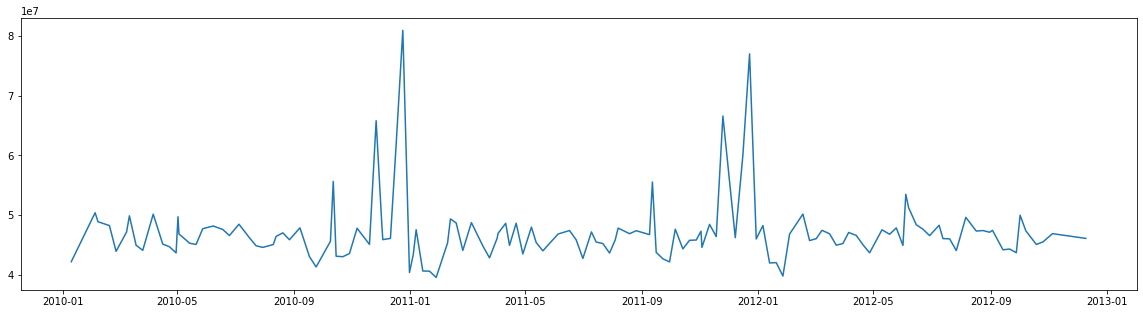

In [103]:
plt.figure(figsize=(20,5))
plt.plot(df_weekly_sales.Date,df_weekly_sales.Weekly_Sales)


In [104]:
df_sales.head()

,Date,Weekly_Sales
46,2010-12-24,80931415.60
98,2011-12-23,76998241.31
95,2011-11-25,66593605.26
41,2010-11-26,65821003.24
45,2010-12-17,61820799.85


In [105]:
df_sales.tail()

,Date,Weekly_Sales
50,2011-01-14,40673678.04
51,2011-01-21,40654648.03
47,2010-12-31,40432519.00
103,2012-01-27,39834974.67
52,2011-01-28,39599852.99


In [106]:
ts=df_weekly_sales.set_index('Date')

In [107]:
df_top_stores=df.groupby('Store',as_index=False)['Weekly_Sales'].sum()

In [108]:
df_top_stores=df_top_stores.set_index('Store')

#### Providing Top 5 Stores & Bottoms 5 Store

In [109]:
df_top_stores=df_top_stores.sort_values('Weekly_Sales', ascending=False)
df_top_stores.head()

,Weekly_Sales
Store,
20,3.013978e+08
4,2.995440e+08
14,2.889999e+08
13,2.865177e+08
2,2.753824e+08


In [110]:
df_top_stores.tail()

,Weekly_Sales
Store,
38,55159626.42
36,53412214.97
5,45475688.90
44,43293087.84
33,37160221.96


#### Forecase of the total sales Volumne

C:\Users\Anil\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


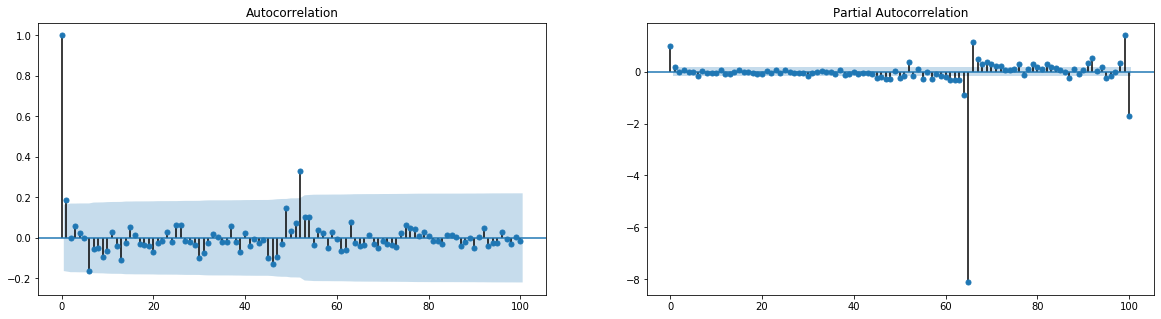

In [111]:
from statsmodels.graphics.tsaplots import acf,pacf,plot_acf,plot_pacf

fig, axes = plt.subplots(1,2,figsize=(20,5))
plot_acf(ts, lags=100, ax=axes[0])
plot_pacf(ts, lags=100, ax=axes[1])
plt.show()


#### Model Building

In [112]:
from sklearn.linear_model import LinearRegression

def fit_ar_model(ts,orders):
    x=np.array([ts.values[(i-orders)].squeeze() if i>=np.max(orders) else np.array(len(orders)* [np.nan]) for i in range(len(ts))])
    mask=~np.isnan(x[:,:1]).squeeze()
    y=ts.values
    lin_reg=LinearRegression()
    lin_reg.fit(x[mask],y[mask])
    print(lin_reg.coef_, lin_reg.intercept_)
    print('Score factor : %.2f' % lin_reg.score(x[mask],y[mask]))
    return lin_reg.coef_,lin_reg.intercept_

In [113]:
from sklearn.linear_model import LinearRegression
def predict_ar_model(ts, orders, coef, intercept):
    return np.array([np.sum(np.dot(coef,ts.values[(i-orders)].squeeze()))+ intercept if i >= np.max(orders) else np.nan for i in range(len(ts))])

[[ 0.13488444 -0.06693086  0.53027452]] [19022705.56418594]
Score factor : 0.41


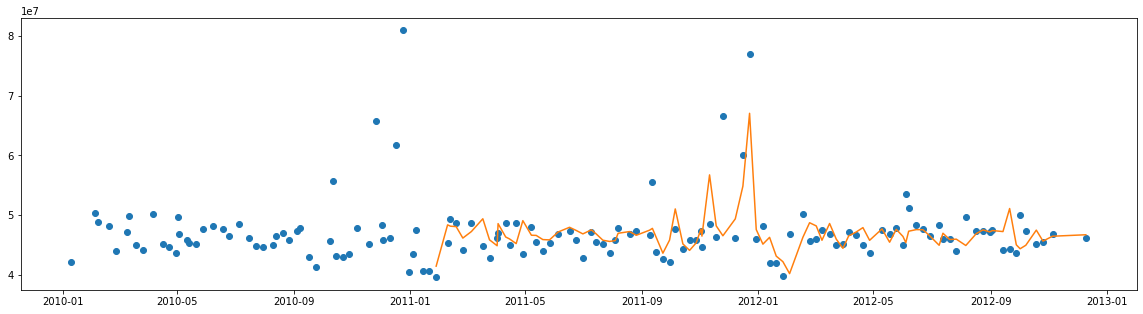

In [114]:
orders= np.array([1,6,52])
coef, intercept = fit_ar_model(ts, orders)
pred=pd.DataFrame(index=ts.index, data=predict_ar_model(ts,orders,coef,intercept))
plt.figure(figsize=(20,5))
plt.plot(ts,'o')
plt.plot(pred)
plt.show()


AR Residuals: avg -0.00, std 0.07


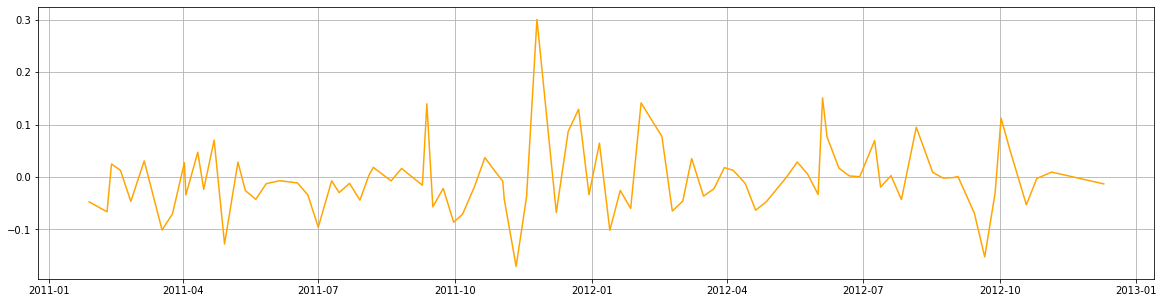

In [115]:
diff=(ts['Weekly_Sales']-pred[0])/ts['Weekly_Sales']

print('AR Residuals: avg %.2f, std %.2f' % (diff.mean(), diff.std()))
 
plt.figure(figsize=(20,5))
plt.plot(diff, c='orange')
plt.grid()
plt.show()

In [117]:
dftext=df.where( df['Store'] == 20)
dftext=dftext.dropna()
dftext=dftext.groupby(by=['Date'], as_index=False)[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].mean()
dftext = dftext.set_index('Date')
dftext.head()

,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,
2010-01-10,61.08,2.707,204.885097,7.484
2010-02-04,51.00,2.850,204.025284,7.856
2010-02-07,70.10,2.815,204.465056,7.527
2010-02-19,25.43,2.745,204.432100,8.187
2010-02-26,32.32,2.754,204.463087,8.187


In [119]:
dftext.describe()

,Temperature,Fuel_Price,CPI,Unemployment
count,143.000000,143.000000,143.000000,143.000000
mean,55.451399,3.417608,209.038131,7.371413
std,16.543846,0.443029,4.176736,0.305069
min,20.390000,2.699000,203.610178,6.961000
25%,42.865000,2.921000,204.774194,7.139000
50%,58.650000,3.541000,208.556714,7.287000
75%,70.330000,3.809000,213.372861,7.484000
max,79.200000,4.066000,216.151590,8.187000


In [125]:
dfext['shifted_sales'] = ts.shift(-1)

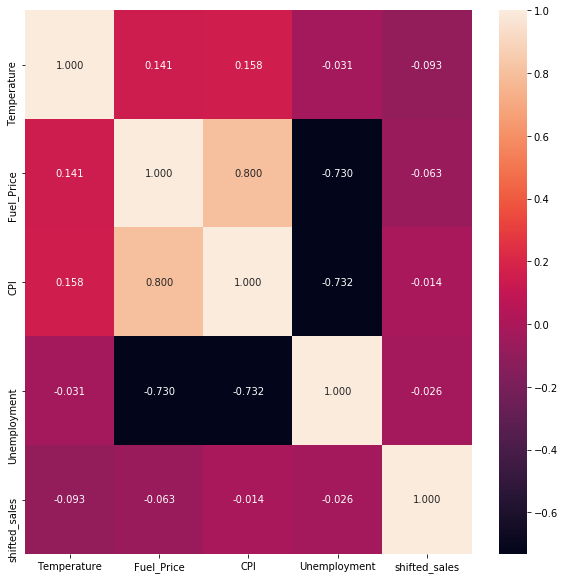

In [126]:
import seaborn as sns
corr = dfext.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
            annot=True, fmt=".3f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [127]:
corr['shifted_sales'].sort_values(ascending=False)

shifted_sales    1.000000
CPI             -0.013919
Unemployment    -0.025758
Fuel_Price      -0.063444
Temperature     -0.092629
Name: shifted_sales, dtype: float64